# Неделя 2. Среда 

## Математический анализ

In [821]:
# Имортируй библиотеки
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import numpy as np

### Анализ

❓Что значит, что производная в точке равна нулю? 

> Это означает, что это точка минимума или максимума функции, либо точка перегиба

Найдите производную функций ниже

1. $y = \dfrac{3x^7}{7}$

$y' =3x^6$

2. $y = -7$

$y' = {0}$

3. $y = \dfrac{9}{x}$

$y' = \dfrac{-9}{x^2}$

4. $y = 11 - 6x$

$y' = -6$

5. $y = 8\sqrt{x} + 7\sin{x}$

$y' = \dfrac{4}{\sqrt{x}}+7cos{x}$

6. $y = \dfrac{\sin{x}}{5x}$

$y' = \dfrac{xcosx-sinx}{5x^2}$

7. $y = \dfrac{\cot{x} + 2}{3x}$

$y' = \dfrac{-x*sinx-cosx-2}{3x^2}$

8. $y = (3-7x)^9$

$y' = -63*(3-7x)^8$

9. Найдите производную в точке $t = 3$:

$y(t) = t^6 - 4t^3$

$y'(3) = -1350$

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks in progress"`
4. Выполни команду `git push`

### Градиентный спуск

#### 1. Градиентный спуск функции одного переменного

1. Задай функцию `loss`: она будет возвращать значение функции в точке. Для начала можно использовать простую функцию, например: 
$$L(\omega) = \omega^2 + 3$$

In [822]:
def loss(w):
    loss=w**2+3
    return loss
print(loss(3))
print(loss(6))

12
39


2. Задай функцию `derivative` - она будет возвращать значение производной функции `loss` в точке. 

In [823]:
def derivative(w):
    derivative=2*w
    return derivative
print(derivative(3))

6


3. Задай функцию `step` - она будет возвращать новое значение весов по формуле:
$$w_{i+1} = w_i - \lambda \cdot \frac{\partial f(w)}{\partial w_i}$$

Входные аргументы: `w` - текущее значение параметра, `lambda` – скорость спуска. 

In [824]:
def step(w, _lambda): 
    gradient = 2*w
    coord=w-_lambda*gradient
    loss_value=2*coord
    '''
    input:
        _lambda - learning rate
    
    returns: 
        coord - w_coord
        loss_value  - y_coord
    '''
    
    return coord, loss_value

4. Задай функцию `get_minima`, которая будет возвращать список, содержащий все значения параметра `w`, и список `loss_values`, который будет содержать значения функции `loss` для соответствующего параметра `w`. На вход функции поступает `w_0` – начальное значение параметра, `eps` – критерий останова. `lambda` - скорость спуска, которая будет передаваться в функцию `step`

In [825]:
def get_minima(w_0, eps, _lambda): 
    w=w_0
    loss_values=[w**2+3]
    loss=loss_values[0]
    while True:
        new_w,new_loss=step(w,_lambda)
        loss_values.append(new_loss)
        if abs(new_loss-loss)<eps:
            break
        w=new_w
        loss=new_loss
    return w, loss_values
# Начальное значение параметра
w_0 = 0.0

# Критерий останова (когда изменение потерь станет меньше eps)
eps = 1e-5

# Скорость обучения
_lambda = 0.1

# Получаем минимальные значения
final_w, loss_values = get_minima(w_0, eps, _lambda)

# Выводим результаты
print("Final value of w:", final_w)
print("Loss values:", loss_values)

Final value of w: 0.0
Loss values: [3.0, 0.0, 0.0]


Нарисуй график функции `loss`. По координатам, возвращенным функцией `get_minima` нарисуй график движения градиентного спуска. 

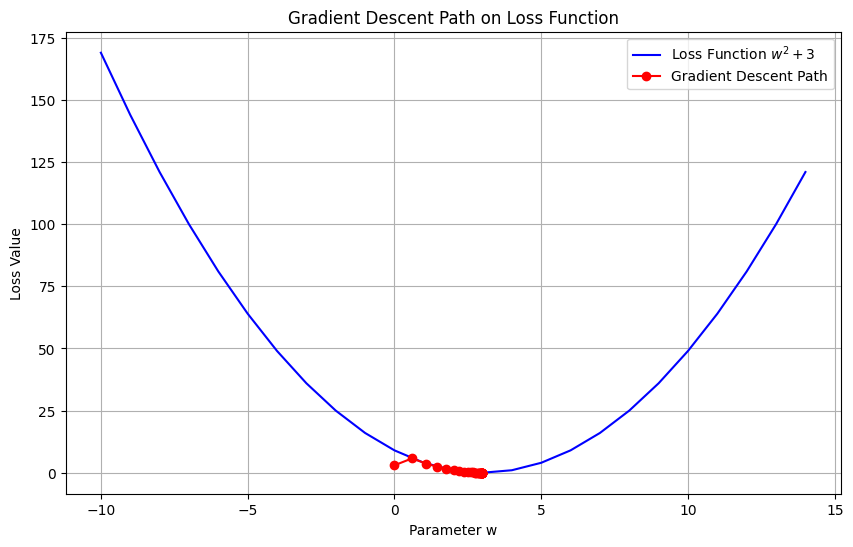

In [826]:
import matplotlib.pyplot as plt

# Реализация функции step
def step(w, _lambda):
    # Прямое вычисление градиента для функции потерь f(w) = (w - 3)^2
    gradient = 2 * (w - 3)  # Градиент для (w - 3)^2
    
    # Обновляем веса
    coord = w - _lambda * gradient
    
    # Вычисляем значение функции потерь после обновления весов
    loss_value = (coord - 3) ** 2  # Значение потерь для (w - 3)^2
    
    return coord, loss_value

# Реализация функции get_minima
def get_minima(w_0, eps, _lambda):
    w = w_0
    loss_values = [w**2+3]  # Начальное значение функции потерь для w_0
    
    loss = loss_values[0]
    
    # Список для хранения координат
    w_values = [w]
    
    while True:
        # Выполняем один шаг градиентного спуска
        new_w, new_loss = step(w, _lambda)
        
        # Добавляем новые значения в списки
        w_values.append(new_w)
        loss_values.append(new_loss)
        
        # Проверяем условие остановки
        if abs(new_loss - loss) < eps:
            break
        
        # Обновляем текущие значения для следующей итерации
        w = new_w
        loss = new_loss
    
    return w_values, loss_values

# Параметры
w_0 = 0.0  # Начальное значение параметра
eps = 1e-5  # Критерий остановки
_lambda = 0.1  # Скорость обучения

# Получаем минимальные значения
w_values, loss_values = get_minima(w_0, eps, _lambda)

# Строим график функции потерь и путь градиентного спуска
x = w_values
y = loss_values

# Создаем график
plt.figure(figsize=(10, 6))

# График функции потерь
w_plot = [i for i in range(-10, 15)]  # Точки для графика функции потерь
loss_plot = [(i - 3) ** 2 for i in w_plot]  # Потери для этих точек
plt.plot(w_plot, loss_plot, label="Loss Function $w^2+3$", color='blue')

# График пути градиентного спуска
plt.plot(x, y, marker='o', label="Gradient Descent Path", color='red')

# Настроим оси и подписи
plt.title("Gradient Descent Path on Loss Function")
plt.xlabel("Parameter w")
plt.ylabel("Loss Value")
plt.legend()
plt.grid(True)

# Покажем график
plt.show()

Нарисуй несколько графиков, соответствующих разным коэффициентам $\lambda$. 

In [827]:
# code

❓ Как выбрать оптимальную скорость обучения?

> _ответ тут_

❓Будет ли зависеть скорость работы всей процедуры от начального выбора значения искомого параметра?

> ответ тут

Поэкспериментируй с результатом, задай функцию: 
$$L(\omega) = \omega^2 - \omega$$

In [828]:
# code

#### 2. Градиентный спуск для функции двух переменных

1. Модифицируй функции из предыдущего задания и реализуй поиск минимума функции двух переменных. 
Функция для минимизации: 
$$\mathcal{L} (\omega_1, \omega_2) = \omega_1^2 + 2\omega_2^2 - 3\omega_1 - 4\omega_2$$

В конце визуализируй результат аналогично предыдущему заданию.


__P.S__: для данной функции, минимальное значение достигается в точке $(\dfrac{3}{2}; 1)$. Это необходимо для самопроверки

In [1]:
def loss2(w):
    w_1, w_2, *_ = ws
    return loss

In [4]:
def derivative2(w):
    w_1, w_2, *_ = ws
    deriv_1 = 2*w_1 - 3
    deriv_2 = 4*w_2 - 4
    return deriv

In [9]:
def step(w, _lambda):
    w_1, w_2, *_ = ws
    coord_1 = w_1 - _lambda * derivative(w_1)
    coord_2 = w_2 - _lambda * derivative(w_2)
    coords = np.array([coord_1, coord_2])
    loss_value = loss2(coords)
    
    return coord, loss_value

2. С помощью градиентного _спуска_ можно найти и __максимум__ функции, для этого нужно внести небольшое изменение в формулу обновления весов. Попробуйте сделать это и визуализировать результат: 
$$L(w_1, w_2) = \dfrac{1}{1+w_1^2} + \dfrac{1}{1+w_2^2}$$  


__P.S__: для данной функции, максимальное значение достигается в точке $(0; 0)$. Это необходимо для самопроверки

NameError: name 'get_minima2' is not defined

3. С помощью градиентного спуска найти минимум функции и визуализировать результат. Незабывайте, код у вас уже реализован в предыдущих заданиях, примените его.  
$$L(w1, w2) = (5 \cdot \omega_1)^2 + \omega_2^2$$

In [833]:
# code

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks stage 2"`
4. Выполни команду `git push`

#### Адаптивная скорость обучения

Модифицируй одну из предыдущих реализаций, добавив [адаптивный подбор скорости обучения](https://en.wikipedia.org/wiki/Learning_rate) (time-based, step-based, exponential)

In [834]:
# code

#### Решение системы линейных уравнений с помощью градиентного спуска


Реализуй класс `Solver` для вычисления решения системы линейных уравнений произвольного размера.  

Логика работы класса должна быть следующей: 

```python

solver = Solver(X, y)
solver.fit(learning_rate=0.01, n_iter=10)
print(solver.mse())
>>> Mean squared error: 0.00313
print(solver.coef_)
>>> [.5, 1, -2]

```

`X` – матрица системы

`y` – вектор ответов

`learning_rate` – шаг градинтного спуска

`n_iter` - число итераций. 

Метод `mse` вычисляет среднеквадратическую ошибку: `sum((y - X@w)**2) / len(w)`, где `w` - искомый вектор коэффициентов. 

Попробуй решить с помощью реализованного класса систему уравнений:
$$
\begin{cases}
2w_1 + 3w_2 - w_3 = 9 \\
w_1 -2w_2 + w_3 = 3 \\
w_1 + 2w_3 = 2
\end{cases}
$$

Решение уравнения выше – 4, 0, -1. Значения, которые ты получишь в процессе оптимизации могут незначительно отличаться. 


In [835]:
X = np.array([
    [2, 3, -1], 
    [1, -2, 1],
    [1, 0, 2]
])

y = np.array([9, 3, 2])

In [836]:
# code

In [837]:
solver = Solver(X, y)
solver.fit(0.1, 100)
solver.mse()

NameError: name 'Solver' is not defined

#### Реализация класса оптимизатора

Реализуй класс, который `Optimizer`, который будет решать задачу минимизации функции, сохранения истории процедуры, визуализации и возможностью выбирать один из типов управления скоростью обучения. Добавь возможность задания параметра для реализации остановки. 

In [8]:
class Optimizer():
    pass

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks completed"`
4. Выполни команду `git push`